# Contoh Forecasting Suhu Permukaan Tanah

Pada contoh ini, kita akan melakukan percobaan untuk melakukan forcasting suhu permukaan tanah di Indonsia dari bulan ke bulan dengan menggunakan model **regresi linier**. Data yang digunakan adalah data dari Climate Change: Earth Surface Temperature Data yang dapat diunduh pada laman [Kaggle](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data?select=GlobalLandTemperaturesByCountry.csv)

***Disclaimer***
> Contoh ini hanya memberikan gambaran terkait dengan proses pengolahan data. Data dan model mungkin tidak sesuai dengan realita di lapangan

## Data Preparation

### Load Data

In [1]:
# Import library yang dibutuhkan
import numpy as np # kebutuhan pengolahan data numerik
import pandas as pd # kebutuhan tabulasi dan manipulasi data

# Muat data
df = pd.read_csv('GlobalLandTemperaturesByCountry.csv')

# Tampilkan sebagian data
display(df.head())

# Cek dimensi data
print(f'Jumlah Baris: {df.shape[0]}')
print(f'Jumlah Kolom: {df.shape[1]}')

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


Jumlah Baris: 577462
Jumlah Kolom: 4


Data ini memuat data suhu permukaan tanah dari berbagai negara. Untuk contoh ini kita hanya akan menggunakan data dari Indonesia

### Filter Data

Kita akan melakukan query hanya untuk kolom 'Country' bernilai 'Indonesia'

In [2]:
# Duplikasi data
df_indo = df.copy()

# Query filter untuk Indonesia
df_indo = df_indo.query("Country == 'Indonesia'")

# Cek sebagian data
display(df_indo.tail()) # dari 5 terbawah

# Cek dimensi data
print(f'Jumlah Baris: {df_indo.shape[0]}')
print(f'Jumlah Kolom: {df_indo.shape[1]}')

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
248568,2013-05-01,26.818,0.154,Indonesia
248569,2013-06-01,26.881,0.248,Indonesia
248570,2013-07-01,25.902,0.164,Indonesia
248571,2013-08-01,25.961,0.319,Indonesia
248572,2013-09-01,NaN,NaN,Indonesia


Jumlah Baris: 2265
Jumlah Kolom: 4


### Deskripsi Data

Selanjutnya, kita akan cek profil data kita dengan menggunakan ukuran statistik deskriptif untuk memastikan data yang kita miliki baik atau tidak. Langkah ini sangat membantu kita dalam membuat model machine learning yang baik pada tahap selanjutnya.

In [3]:
# Import library yang dibutuhkan
from skimpy import skim as sk # kebutuhan deskripsi data

# Cek deskripsi data
sk(df_indo)

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                Data Types                                           │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                    │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                    │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                    │
│ │ Number of rows    │ 2265   │ │ object      │ 2     │                                    │
│ │ Number of columns │ 4      │ │ float64     │ 2     │                                    │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                    │
│                                          number                                           │
│ ┏━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃            ┃ missing ┃ complete   ┃ mean ┃ sd   ┃ p0   ┃ p25  ┃ p75  ┃ p100 ┃ hist   ┃  │
│ ┃            ┃         ┃ rate       ┃      ┃      ┃      ┃      ┃      ┃      ┃        ┃  │
│ ┡━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ AverageTem │     390 │       0.83 │   26 │ 0.52 │   24 │   25 │   26 │   27 │  ▂▇█▃  │  │
│ │ perature   │         │            │      │      │      │      │      │      │        │  │
│ │ AverageTem │     390 │       0.83 │ 0.45 │  0.3 │ 0.07 │ 0.23 │ 0.58 │  2.2 │  █▄▁   │  │
│ │ peratureUn │         │            │      │      │      │      │      │      │        │  │
│ └────────────┴─────────┴────────────┴──────┴──────┴──────┴──────┴──────┴──────┴────────┘  │
╰─────────────────────────────────────────── End ───────────────────────────────────────────╯

In [4]:
# Cara lain untuk cek deskripsi data. Dengan library pandas.

# Cek Profil Data
print(df_indo.info())

print('========')

# Cek Stastistik Deskriptif
print(df_indo.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2265 entries, 246308 to 248572
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   dt                             2265 non-null   object 
 1   AverageTemperature             1879 non-null   float64
 2   AverageTemperatureUncertainty  1879 non-null   float64
 3   Country                        2265 non-null   object 
dtypes: float64(2), object(2)
memory usage: 88.5+ KB
None
       AverageTemperature  AverageTemperatureUncertainty
count         1879.000000                    1879.000000
mean            25.684484                       0.447499
std              0.519264                       0.298915
min             23.730000                       0.070000
25%             25.303000                       0.233500
50%             25.686000                       0.353000
75%             26.065000                       0.581000
max          

Berdasarkan hasil deskripsi data, diketahui terdapat data yang hilang (*missing value*) pada kolom '**AverageTemperature**' dan '**AverageTemperatureUncertainty**'. Kita perlu melakukan sesuatu terhadap data yang kosong.

Terdapat paling tidak 2 strategi yang dapat kita lakukan terhadap data tersebut.
1. Buang data
2. Manipulasi dengan mengganti nilainya (*impute*)

Pada kasus ini, karena data yang digunakan hanya sedikit, maka cukup "sayang" untuk dibuang. Maka kita putuskan untuk menggunakan strategi yang kedua.

### Data Cleansing

#### Mengganti Nilai Kosong (NaN)

Kita akan menggnati nilai yang kosong pada '**AverageTemperature**' dan '**AverageTemperatureUncertainty**' dengan nilai rata-ratanya.

In [5]:
# Impute mean pada 'AverageTemperature'
df_indo['AverageTemperature'] = df_indo['AverageTemperature'].fillna(df_indo['AverageTemperature'].mean())

# Impute mean pada 'AverageTemperatureUncertainty'
df_indo['AverageTemperatureUncertainty'] = df_indo['AverageTemperatureUncertainty'].fillna(df_indo['AverageTemperatureUncertainty'].mean())

# Cek deskripsi data
sk(df_indo)

# Cek data
display(df_indo.head(10)) # 10 data teratas

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                Data Types                                           │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                    │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                    │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                    │
│ │ Number of rows    │ 2265   │ │ object      │ 2     │                                    │
│ │ Number of columns │ 4      │ │ float64     │ 2     │                                    │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                    │
│                                          number                                           │
│ ┏━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃            ┃ missing ┃ complete   ┃ mean ┃ sd   ┃ p0   ┃ p25  ┃ p75  ┃ p100 ┃ hist   ┃  │
│ ┃            ┃         ┃ rate       ┃      ┃      ┃      ┃      ┃      ┃      ┃        ┃  │
│ ┡━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ AverageTem │       0 │          1 │   26 │ 0.47 │   24 │   25 │   26 │   27 │  ▁▅█▂  │  │
│ │ perature   │         │            │      │      │      │      │      │      │        │  │
│ │ AverageTem │       0 │          1 │ 0.45 │ 0.27 │ 0.07 │ 0.25 │ 0.53 │  2.2 │  █▆▁   │  │
│ │ peratureUn │         │            │      │      │      │      │      │      │        │  │
│ └────────────┴─────────┴────────────┴──────┴──────┴──────┴──────┴──────┴──────┴────────┘  │
╰─────────────────────────────────────────── End ───────────────────────────────────────────╯

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
246308,1825-01-01,25.915,1.825,Indonesia
246309,1825-02-01,25.385,0.973,Indonesia
246310,1825-03-01,25.687,1.656,Indonesia
246311,1825-04-01,26.302,1.897,Indonesia
246312,1825-05-01,25.705,0.902,Indonesia
246313,1825-06-01,26.161,0.836,Indonesia
246314,1825-07-01,25.567,2.009,Indonesia
246315,1825-08-01,24.970,1.858,Indonesia
246316,1825-09-01,24.870,1.439,Indonesia
246317,1825-10-01,24.788,1.580,Indonesia


#### Transformasi Data Tanggal

Selanjutnya, pastikan data tanggal yang digunakan sudah benar memiliki tipe data dan format tanggal.

In [6]:
# Format data ke year-month-day
df_indo['dt'] = pd.to_datetime(df_indo['dt'], format="%Y-%m-%d")

# Urutkan data
df_indo.sort_values('dt', inplace=True)

# Cek data
display(df_indo.head(10))

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
246308,1825-01-01,25.915,1.825,Indonesia
246309,1825-02-01,25.385,0.973,Indonesia
246310,1825-03-01,25.687,1.656,Indonesia
246311,1825-04-01,26.302,1.897,Indonesia
246312,1825-05-01,25.705,0.902,Indonesia
246313,1825-06-01,26.161,0.836,Indonesia
246314,1825-07-01,25.567,2.009,Indonesia
246315,1825-08-01,24.970,1.858,Indonesia
246316,1825-09-01,24.870,1.439,Indonesia
246317,1825-10-01,24.788,1.580,Indonesia


Pada kasus forcasting ini, kita akan menggunakan kolom '**dt**' dan '**AverageTemperature**' saja. Namun terdapat satu permasalahan. Tipe data 'date' atau tanggal tidak dapat digunakan dalam formulasi matematis regresi linier. Apa yang harus kita lakukan? **Ubah bentuknya ke dalam bentuk ordinal (transformasi)**.

In [7]:
# Import library yang dibutuhkan
import datetime as dt

# Transformasi data tanggal ke nilai ordinal
df_indo['dt'] = df_indo['dt'].map(dt.datetime.toordinal)

# Cek data
display(df_indo.head(10))

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
246308,666203,25.915,1.825,Indonesia
246309,666234,25.385,0.973,Indonesia
246310,666262,25.687,1.656,Indonesia
246311,666293,26.302,1.897,Indonesia
246312,666323,25.705,0.902,Indonesia
246313,666354,26.161,0.836,Indonesia
246314,666384,25.567,2.009,Indonesia
246315,666415,24.970,1.858,Indonesia
246316,666446,24.870,1.439,Indonesia
246317,666476,24.788,1.580,Indonesia


Tanggal sudah dirubah menjadi nilai yang dapat kita guakan pada model regresi linier.

### Data Validation

Sebelum masuk kepada tahap pembuatan model, kita perlu memastikan data yang kita miliki memenuhi asumsi-asumsi (jika ada) yang digunakan oleh model yang kita rencanakan. Dikarenakan pada model regresi linier meminta asumsi bahwa terdapat **korelasi** antara variabel dependen dan variabel independen, maka kita perlu melakukan pengecekan terhadap hal ini.

Pada kasus ini, variabel dependen adalah '**AverageTemperature**' dan variabel independen adalah '**dt**'.

#### Cek Korelasi

<AxesSubplot:>

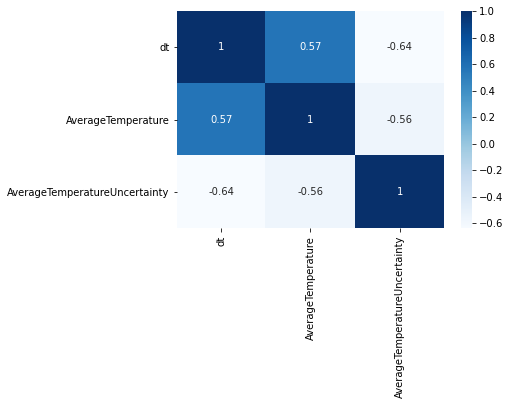

In [8]:
# Import library
import matplotlib.pyplot as plt # visualisasi dasar
import seaborn as sns # visualisasi high-level

corr = df_indo.corr().round(2)
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot = True, cmap = 'Blues')

Berdasarkan korelasi, kolom yang kita targekan miliki korelasi yang cukup baik, yaitu $0.57$. Sehingga, kita dapat berasumsi, bahwa model regresi dapat menghasilkan hasil prediksi yang cukup baik.

## Feature Selection

Tahap ini biasanya digunakan untuk memilih fitur yang akan digunakan pada model. Pada kasus ini, fitur digambarkan pada nilai-nilai kolom. Namun dikarenakan yang kita gunakan kecil, dan kita sudah menentukan fitur apa yang akan digunakan, maka pada contoh ini kita cukup '*slicing*' data untuk variabel independen dan variabel dependen.

### Slicing

In [9]:
# Slicing data
X = df_indo[['dt']].values
y = df_indo[['AverageTemperature']].values

# Cek independen variabel
print(X)

[[666203]
 [666234]
 [666262]
 ...
 [735050]
 [735081]
 [735112]]


### Split Data Training dan Testing

Selanjutnya, kita membuat data training dan testing untuk kebutuhan melatih dan menguji model regresi yang dibuat

In [10]:
# Import library
from sklearn.model_selection import train_test_split

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model

Pada bagian ini kita akan membuat model regresi linier

In [11]:
# Import library
from sklearn.linear_model import LinearRegression

# Inisais obyek
lr = LinearRegression()

# Latih model
lr.fit(X_train, y_train)

LinearRegression()

### Visualisasi Model (Data Training)

Pada model regresi, kita dapat dengan memudah melakukan inspeksi visual terhadap model yang dihasilkan, apalagi data hanya 2 dimensi.

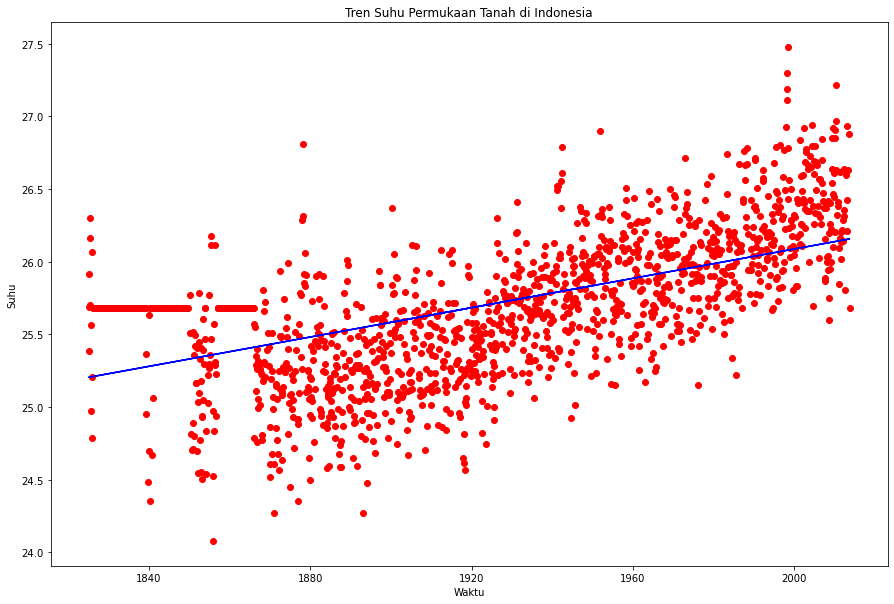

In [12]:
# Transformasi kembali data tanggal format ordinal
# ke format year-month-day

# Ubah ke dataframe untuk memudahkan
X_train_date = pd.DataFrame(X_train.flatten(), columns=['date'])

# Ubah kembali ke year-month-day
X_train_date['date'] = X_train_date['date'].astype(int).map(dt.date.fromordinal)

# Visualisasi model berdasarkan hasil training
plt.figure(figsize=(15,10))
plt.plot_date(X_train_date['date'].values, y_train, color = 'red')
plt.plot(X_train_date['date'].values, lr.predict(X_train), color = 'blue')
plt.title('Tren Suhu Permukaan Tanah di Indonesia')
plt.xlabel('Waktu')
plt.ylabel('Suhu')
plt.show()

### Prediksi

Selanjutnya, kita coba uji model dengan data testing untuk mengetahui apakah model yang dibuat sudah bekerja dengan baik

In [13]:
y_pred = lr.predict(X_test)

### Visuaslisasi Hasil Prediksi

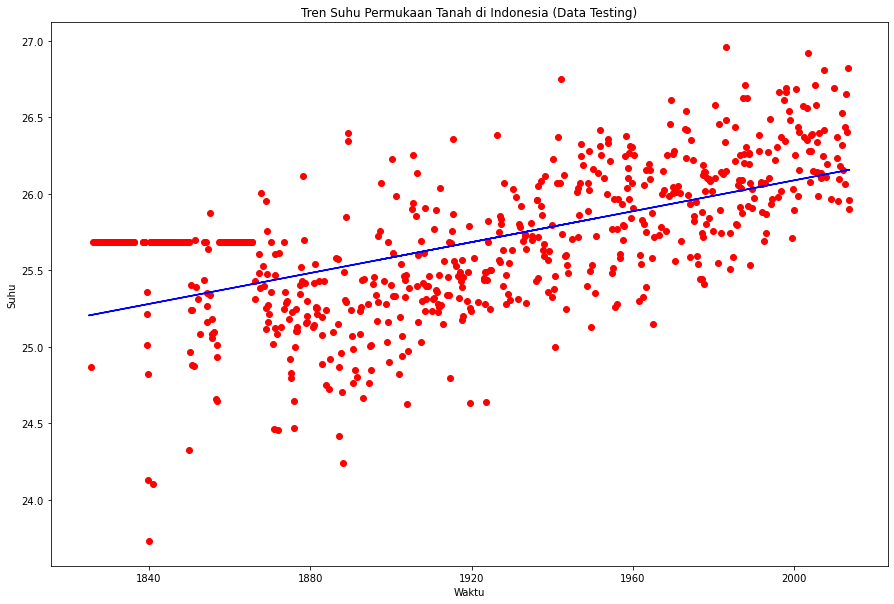

In [14]:
# Transformasi kembali data tanggal format ordinal
# ke format year-month-day

# Ubah ke dataframe untuk memudahkan
X_test_date = pd.DataFrame(X_test.flatten(), columns=['date'])

# Ubah kembali ke year-month-day
X_test_date['date'] = X_test_date['date'].astype(int).map(dt.date.fromordinal)

# Visualisasi model berdasarkan hasil training
plt.figure(figsize=(15,10))
plt.plot_date(X_test_date['date'].values, y_test, color = 'red')
plt.plot(X_train_date['date'].values, lr.predict(X_train), color = 'blue')
plt.title('Tren Suhu Permukaan Tanah di Indonesia (Data Testing)')
plt.xlabel('Waktu')
plt.ylabel('Suhu')
plt.show()

## Evaluasi Model

Selain melalui inspeksi visual, kita dapat melakukan perhitungan untuk mengevaluasi model yang kita buat. Pada kasus regresi, terdapat beberapa metric yang dapat digunakan untuk evaluasi, salah diantaranya adalah nilai $R^2$

In [15]:
from sklearn.metrics import r2_score

# Kalklasi r-square
r2_score = r2_score(y_test, y_pred)

print(f'Skor R2: {r2_score}')

Skor R2: 0.3292837594043757


Hasil evaluasi $R^2$ menunjukkan nilai yang mendekati 0. Hal ini menandakan, model regresi linier yang dibuat kurang baik dalam memprediksi tren. Mengapa demikian? Karena tidak seharusnya data tanggal menjadi ajuan kenaikkan suhu. Kita dapat menggunakan data-data lain yang lebih revelan.